In [122]:
import pandas as pd
stroke = pd.read_csv("/content/brain_stroke.csv")

In [123]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [124]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Pengecekan nilai NaN

In [125]:
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Melakukan konversi data kategori menjadi numerik

In [126]:
stroke['gender'] = stroke['gender'].map({'Male': 1, 'Female': 0})
stroke['ever_married'] = stroke['ever_married'].map({'Yes': 1, 'No': 0})
stroke['work_type'] = stroke['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3})
stroke['Residence_type'] = stroke['Residence_type'].map({'Urban': 0, 'Rural': 1})
stroke['smoking_status'] = stroke['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})

stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,1,1
1,1,80.0,0,1,1,0,1,105.92,32.5,0,1
2,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,0,79.0,1,0,1,1,1,174.12,24.0,0,1
4,1,81.0,0,0,1,0,0,186.21,29.0,1,1


In [127]:
stroke.drop('gender',axis=1,inplace=True)
stroke.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,0,228.69,36.6,1,1
1,80.0,0,1,1,0,1,105.92,32.5,0,1
2,49.0,0,0,1,0,0,171.23,34.4,2,1
3,79.0,1,0,1,1,1,174.12,24.0,0,1
4,81.0,0,0,1,0,0,186.21,29.0,1,1


Memisahkan atribut dengan label dimana X itu atribut dan Y itu label

In [128]:
X = stroke[['age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
Y = stroke['stroke']

Membagi dataset menjadi data latih dan data uji

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1, random_state=10)

In [130]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model decision tree
tree_model = DecisionTreeClassifier()

# Melatih model menggunakan data latih dengan fungsi fit
tree_model = tree_model.fit(x_train,y_train)

Evaluasi model untuk menguji seberapa baik model yang digunakan dan akurasi

In [131]:
from sklearn.metrics import accuracy_score

mapping = {0: 'Tidak Stroke', 1: 'Stroke'}

print(mapping, '\n')

y_pred = tree_model.predict(x_test)

accuracy_score = round(accuracy_score(y_pred, y_test), 3)

print('Akurasi : ', accuracy_score)

{0: 'Tidak Stroke', 1: 'Stroke'} 

Akurasi :  0.912


Prediksi model

In [132]:
print(tree_model.predict([[67,0,1,1,0,0,228.69,36.6,1]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [133]:
print(tree_model.predict([[58,1,0,1,0,0,87.96,39.2,0]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Visualisasi Data

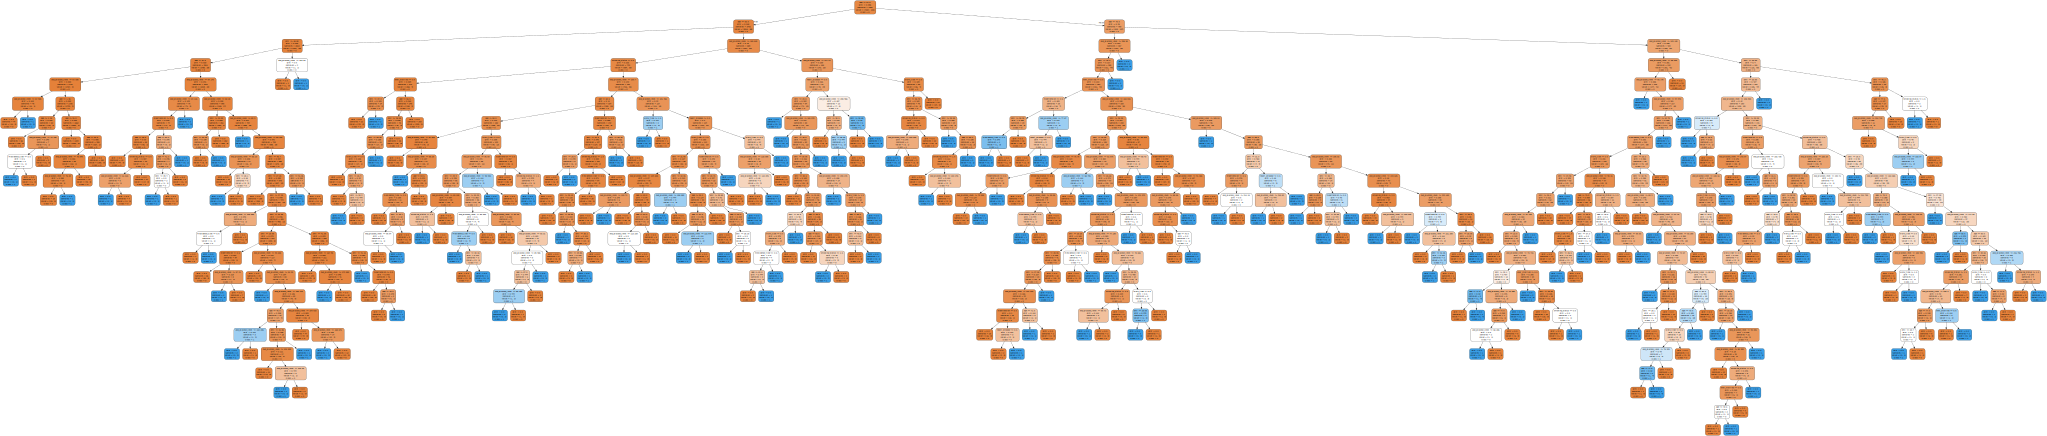

In [134]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_model,
                out_file='brain_stroke_tree.dot',
                feature_names=['age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'],
                class_names=['0','1'],
                rounded=True,
                filled=True)

with open('brain_stroke_tree.dot') as t:
  dot_graph = t.read()

graphviz.Source(dot_graph)